In [0]:
#Import Libraries
import pandas as pd
import numpy as np
#from kmodes.kmodes import KModes
import plotly.graph_objects as go
from sklearn.manifold import TSNE

%matplotlib inline
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


from sklearn.externals import joblib

import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import numpy as np
from scipy import special

# Rule based classifier
from sklearn.dummy import DummyClassifier

# Modelling
from sklearn.model_selection import train_test_split, cross_val_score

# Decistion tree
from sklearn.tree import DecisionTreeClassifier

# One of the Ensemle model -- Random Forset which is ensemple of decision trees
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

# import logistic regression, SVC  for ensembling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Distance based
from sklearn.neighbors import KNeighborsClassifier

# packages for metric for evalaution of the models
from sklearn import metrics
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix

py.offline.init_notebook_mode(connected=True)   # for offline mode use
import plotly.offline as po

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

#Import Data...by joblist
#import joblib
#joblib.load(r'C:\Users\Advitiay\Downloads\PreProcess\df_pre')

# Importing dataset from G-Drive

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=1Qjt6EDmtDk-osJGyWQ-uFnCsEdlqHFl5'
fluff, id = link.split('=')
print(id) # Verify that you have everything after '='

1Qjt6EDmtDk-osJGyWQ-uFnCsEdlqHFl5


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data.csv')  
df = pd.read_csv('data.csv')
# Dataset is now stored in a Pandas Datafram

In [0]:
df.head()

,Unnamed: 0,PageValues,ExitRates,ProductRelated_Duration,ProductRelated,Administrative,Administrative_Duration,TrafficType,SpecialDay,BounceRates,Informational,Revenue
0,0,-0.412394,4.198745,-0.811774,-0.898440,-0.906228,-0.594439,-0.991568,-0.401528,4.768066,-0.515499,1
1,1,-0.412394,1.523144,-0.768289,-0.869205,-0.906228,-0.594439,-0.668538,-0.401528,-0.595078,-0.515499,1
2,2,-0.412394,4.198745,-0.811774,-0.898440,-0.906228,-0.594439,-0.345508,-0.401528,4.768066,-0.515499,1
3,3,-0.412394,2.593385,-0.809963,-0.869205,-0.906228,-0.594439,-0.022478,-0.401528,0.745708,-0.515499,1
4,4,-0.412394,0.185344,-0.385417,-0.635323,-0.906228,-0.594439,-0.022478,-0.401528,-0.058763,-0.515499,1


In [0]:
df.shape

(20844, 12)

In [0]:
#Dropping first column
df = df.iloc[ : , 1: ]

In [0]:
df.shape

(20844, 11)

In [0]:
df.head()

,PageValues,ExitRates,ProductRelated_Duration,ProductRelated,Administrative,Administrative_Duration,TrafficType,SpecialDay,BounceRates,Informational,Revenue
0,-0.412394,4.198745,-0.811774,-0.898440,-0.906228,-0.594439,-0.991568,-0.401528,4.768066,-0.515499,1
1,-0.412394,1.523144,-0.768289,-0.869205,-0.906228,-0.594439,-0.668538,-0.401528,-0.595078,-0.515499,1
2,-0.412394,4.198745,-0.811774,-0.898440,-0.906228,-0.594439,-0.345508,-0.401528,4.768066,-0.515499,1
3,-0.412394,2.593385,-0.809963,-0.869205,-0.906228,-0.594439,-0.022478,-0.401528,0.745708,-0.515499,1
4,-0.412394,0.185344,-0.385417,-0.635323,-0.906228,-0.594439,-0.022478,-0.401528,-0.058763,-0.515499,1


In [0]:
#Creating separate dataframes for columns and class label
df_col = df.iloc[:, :10]     #Columns
df_class = df.iloc[:, 10:11]   #Class

In [0]:
df_col.head()

,PageValues,ExitRates,ProductRelated_Duration,ProductRelated,Administrative,Administrative_Duration,TrafficType,SpecialDay,BounceRates,Informational
0,-0.412394,4.198745,-0.811774,-0.898440,-0.906228,-0.594439,-0.991568,-0.401528,4.768066,-0.515499
1,-0.412394,1.523144,-0.768289,-0.869205,-0.906228,-0.594439,-0.668538,-0.401528,-0.595078,-0.515499
2,-0.412394,4.198745,-0.811774,-0.898440,-0.906228,-0.594439,-0.345508,-0.401528,4.768066,-0.515499
3,-0.412394,2.593385,-0.809963,-0.869205,-0.906228,-0.594439,-0.022478,-0.401528,0.745708,-0.515499
4,-0.412394,0.185344,-0.385417,-0.635323,-0.906228,-0.594439,-0.022478,-0.401528,-0.058763,-0.515499


In [0]:
df_class.head()

,Revenue
0,1
1,1
2,1
3,1
4,1


In [0]:
df_class['Revenue'].value_counts()

1    10422
0    10422
Name: Revenue, dtype: int64

In [0]:
#Printing all columns
cols = df.columns
print(cols)

#Listing down all columns in a list except 'Revenue' feature
print("\n")
cols_list = df.columns.tolist()
cols_list = [c for c in cols_list if c not in ["Revenue"]]
print(cols_list)


Index(['PageValues', 'ExitRates', 'ProductRelated_Duration', 'ProductRelated',
       'Administrative', 'Administrative_Duration', 'TrafficType',
       'SpecialDay', 'BounceRates', 'Informational', 'Revenue'],
      dtype='object')


['PageValues', 'ExitRates', 'ProductRelated_Duration', 'ProductRelated', 'Administrative', 'Administrative_Duration', 'TrafficType', 'SpecialDay', 'BounceRates', 'Informational']


# Checking Accuracies of Various Classifiers




In [0]:
#We are Using following algorithms for our classification:-

# Linear classifier: LogisticRegression(), LinearSVC()
# Tree-based Models: DecisionTreeClassifier()
# Distance-based models: KNeighborsClassifier()
# Rule-based: DummyClassifier()
# Probabilistic model(Naive Bayes Classifier): GaussianNB()

#Appending all model classifiers in one list
models=list()
models = [LogisticRegression(), LinearSVC(), DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=5),DummyClassifier(),GaussianNB()]

# Defining 10 cross validation
cv_no = 10
cv_df = pd.DataFrame(index=range(cv_no * len(models)))

X=df_col
y=df_class
acc_list = list()

for model in models:
  model_name = model.__class__.__name__
  acc_vals = cross_val_score(model, X, y, scoring='accuracy', cv=cv_no)
    
  for index, accuracy in enumerate(acc_vals):
    acc_list.append((model_name, index, accuracy))

cv_df = pd.DataFrame(acc_list, columns=['Model_Name', 'Fold_Index', 'Accuracy'])
cv_df.groupby('Model_Name').Accuracy.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to si

Model_Name
DecisionTreeClassifier    0.893341
DummyClassifier           0.505325
GaussianNB                0.746240
KNeighborsClassifier      0.910860
LinearSVC                 0.914519
LogisticRegression        0.927427
Name: Accuracy, dtype: float64

#### **Results:**    **Logistic Regression** has highest accuracy closely followed by Linear SVC and K nearest neighbour.  

In [0]:
# Just having a look over accuracy Results
cv_df

,Model_Name,Fold_Index,Accuracy
0,LogisticRegression,0,0.902205
1,LogisticRegression,1,0.803452
2,LogisticRegression,2,0.958253
3,LogisticRegression,3,0.943378
4,LogisticRegression,4,0.946257
5,LogisticRegression,5,0.924184
6,LogisticRegression,6,0.950096
7,LogisticRegression,7,0.946737
8,LogisticRegression,8,0.952975
9,LogisticRegression,9,0.946737


## **Note**: Now we will try to apply 3 ensembling techniques on our best performed(with higher-close accuracies) classifier algorithms, and see how they improve our accuracies more.

### Three ensembling techniques, we will use:
### Bagging: BaggingClassifier()
### Boosting: AdaBoostClassifier()
### Random Forest: RandomForestClassifier() 
 

# Run Different Ensembler techniques on LogisticRegression() and select ensembler with best accuracy

In [0]:
#We are Using following ensembling techniques

# Bagging: BaggingClassifier()
# Boosting: AdaBoostClassifier()
# Random Forest: RandomForestClassifier()

#Default n_estimators=10

#Appending all model classifiers in one list
models=list()
models = [BaggingClassifier(LogisticRegression(), max_samples = 0.5), AdaBoostClassifier(LogisticRegression()),RandomForestClassifier()]

# Defining 10 cross validation
cv_no = 10
df_en = pd.DataFrame(index=range(cv_no * len(models)))

X=df_col
y=df_class
acc_list = list()

for model in models:
  model_name = model.__class__.__name__
  acc_vals = cross_val_score(model, X, y, scoring='accuracy', cv=cv_no)
    
  for index, accuracy in enumerate(acc_vals):
    acc_list.append((model_name, index, accuracy))

df_en = pd.DataFrame(acc_list, columns=['Model_Name', 'Fold_Index', 'Accuracy'])
df_en.groupby('Model_Name').Accuracy.mean()



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3

Model_Name
AdaBoostClassifier        0.464859
BaggingClassifier         0.926852
RandomForestClassifier    0.910950
Name: Accuracy, dtype: float64

#### **BaggingClassifier** has highest accuracy followed by RandomForestClassifier

# Check performance/classification metrics of LogisticRegression() with BaggingClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

No handles with labels found to put in legend.


Accuracy = 
0.9320434921650144


Classification Metrics = 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3127
           1       0.96      0.90      0.93      3127

    accuracy                           0.93      6254
   macro avg       0.93      0.93      0.93      6254
weighted avg       0.93      0.93      0.93      6254

AUC = 0.9320434921650144


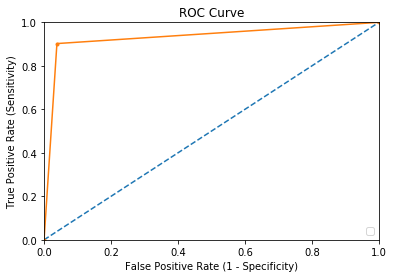

In [0]:
import pandas as pd

X=df_col
y=df_class
#Splitting Data into Training and Test Sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

#Make an instance of a model
logisticRegr = LogisticRegression(solver='liblinear')
#Training the model on the data
logisticRegr.fit(x_train, y_train) #Storing information learned from relationship between x_train and y_train
lr_pred = logisticRegr.predict(x_test)

print("Accuracy = ")
print(logisticRegr.score(x_test, y_test))
print("\n")
print("Classification Metrics = ")
print(classification_report(y_test, lr_pred))

# calculaye fpr, tpr
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test,  lr_pred)
# calculate Area Under the curve
auc_lr = metrics.roc_auc_score(y_test, lr_pred)

print("AUC = " + str(auc_lr))
       
# plot
pyplot.plot([0, 1], [0, 1], linestyle='--')

pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.0])
pyplot.xlabel('False Positive Rate (1 - Specificity)')        
pyplot.ylabel('True Positive Rate (Sensitivity)')        
pyplot.legend(loc="lower right")

# plot the roc curve for the model
pyplot.plot(fpr_lr, tpr_lr, marker='.')
# show the plot
pyplot.title('ROC Curve')
pyplot.show()

# As LinearSVC() has difference of only 1.3% in accuracy from LogisticRegression(), lets run different ensembler techniques on LinearSVC() and select ensembler with best accuracy, to compare to former model.

In [0]:
#We are Using following ensembling techniques
from sklearn import linear_model

# Bagging: BaggingClassifier()
# Boosting: AdaBoostClassifier()
# Random Forest: RandomForestClassifier()

#Default n_estimators=10

#Appending all model classifiers in one list
models=list()
models = [BaggingClassifier(LinearSVC(), max_samples = 0.5), RandomForestClassifier()]

# Defining 10 cross validation
cv_no = 10
df_en = pd.DataFrame(index=range(cv_no * len(models)))

X=df_col
y=df_class
acc_list = list()

for model in models:
  model_name = model.__class__.__name__
  acc_vals = cross_val_score(model, X, y, scoring='accuracy', cv=cv_no)
    
  for index, accuracy in enumerate(acc_vals):
    acc_list.append((model_name, index, accuracy))

df_en = pd.DataFrame(acc_list, columns=['Model_Name', 'Fold_Index', 'Accuracy'])
df_en.groupby('Model_Name').Accuracy.mean()



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/

Model_Name
BaggingClassifier         0.912696
RandomForestClassifier    0.909895
Name: Accuracy, dtype: float64

#### **BaggingClassifier** has highest accuracy 

# Check performance/classification metrics of LinearSVC() with BaggingClassifier, using train-and-test paradigm

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

No handles with labels found to put in legend.


Accuracy = 
0.9253277902142629


Classification Metrics = 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3127
           1       0.96      0.88      0.92      3127

    accuracy                           0.93      6254
   macro avg       0.93      0.93      0.93      6254
weighted avg       0.93      0.93      0.93      6254

AUC = 0.9253277902142629


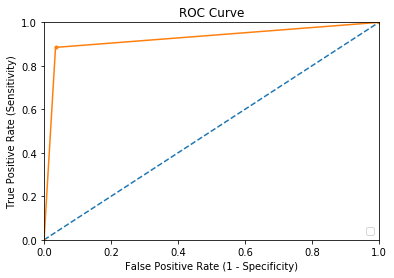

In [0]:
X=df_col
y=df_class
#Splitting Data into Training and Test Sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

#Make an instance of a model
lsvc = LinearSVC()
#Training the model on the data
lsvc.fit(x_train, y_train) #Storing information learned from relationship between x_train and y_train
lsvc_pred = lsvc.predict(x_test)

print("Accuracy = ")
print(lsvc.score(x_test, y_test))
print("\n")
print("Classification Metrics = ")
print(classification_report(y_test, lsvc_pred))

# calculaye fpr, tpr
fpr_lsvc, tpr_lsvc, thresholds_lsvc = metrics.roc_curve(y_test,  lsvc_pred)
# calculate Area Under the curve
auc_lsvc = metrics.roc_auc_score(y_test, lsvc_pred)

print("AUC = " + str(auc_lsvc))

# plot
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.0])
pyplot.xlabel('False Positive Rate (1 - Specificity)')        
pyplot.ylabel('True Positive Rate (Sensitivity)')        
pyplot.legend(loc="lower right")
# plot the roc curve for the model
pyplot.plot(fpr_lsvc, tpr_lsvc, marker='.')
# show the plot
pyplot.title('ROC Curve')
pyplot.show()


# As KNeighborsClassifier() has difference of only 1.6% in accuracy from LogisticRegression(), lets run different ensembler techniques on KNeighborsClassifier() and select ensembler with best accuracy, to compare to former models.

In [0]:
#We are Using following ensembling techniques

# Bagging: BaggingClassifier()
# Boosting: AdaBoostClassifier()
# Random Forest: RandomForestClassifier()

#Default n_estimators=10
                             
#Appending all model classifiers in one list
models=list()
models = [BaggingClassifier(KNeighborsClassifier(n_neighbors=5), max_samples = 0.5), RandomForestClassifier()]

# Defining 10 cross validation
cv_no = 10
df_en = pd.DataFrame(index=range(cv_no * len(models)))

X=df_col
y=df_class
acc_list = list()

for model in models:
  model_name = model.__class__.__name__
  acc_vals = cross_val_score(model, X, y, scoring='accuracy', cv=cv_no)
    
  for index, accuracy in enumerate(acc_vals):
    acc_list.append((model_name, index, accuracy))

df_en = pd.DataFrame(acc_list, columns=['Model_Name', 'Fold_Index', 'Accuracy'])
df_en.groupby('Model_Name').Accuracy.mean()



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConv

Model_Name
BaggingClassifier         0.916665
RandomForestClassifier    0.907737
Name: Accuracy, dtype: float64

#### **BaggingClassifier** has highest accuracy 

# Check performance/classification metrics of KNeighborsClassifier() with BaggingClassifier, using train-and-test paradigm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy = 


No handles with labels found to put in legend.


0.9318835944995203


Classification Metrics = 
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3127
           1       0.91      0.96      0.93      3127

    accuracy                           0.93      6254
   macro avg       0.93      0.93      0.93      6254
weighted avg       0.93      0.93      0.93      6254

AUC = 0.9318835944995203


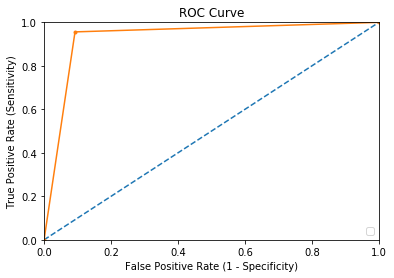

In [0]:
X=df_col
y=df_class
#Splitting Data into Training and Test Sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

#Make an instance of a model
knn = KNeighborsClassifier(n_neighbors=5)
#Training the model on the data
knn.fit(x_train, y_train) #Storing information learned from relationship between x_train and y_train
knn_pred = knn.predict(x_test)

print("Accuracy = ")
print(knn.score(x_test, y_test))
print("\n")
print("Classification Metrics = ")
print(classification_report(y_test, knn_pred))

# calculaye fpr, tpr
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test,  knn_pred)
# calculate Area Under the curve
auc_knn = metrics.roc_auc_score(y_test, knn_pred)

print("AUC = " + str(auc_knn))

# plot
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.0])
pyplot.xlabel('False Positive Rate (1 - Specificity)')        
pyplot.ylabel('True Positive Rate (Sensitivity)')        
pyplot.legend(loc="lower right")
# plot the roc curve for the model
pyplot.plot(fpr_knn, tpr_knn, marker='.')
# show the plot
pyplot.title('ROC Curve')
pyplot.show()


### **Observation:** Though *logistic Regression* turns out to be best Classifier after performing ensembling techniques but one interesting fact comes out that *K nearest neigbours turns out be second best performer* with higher accuracy and precision, than LinearSVC, after ensembling. Though before ensembling LinearSVC gave second best performance.

# Exporting Dataset to Google drive

In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
cv_df.to_csv('cross_val_models.csv')
!cp cross_val_models.csv drive/My\ Drive/


***********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************


# References

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

https://stackoverflow.com/questions/27107205/sklearn-ensemble-adaboostclassifier-cannot-accecpt-svm-as-base-estimator

https://www.geeksforgeeks.org/ml-bagging-classifier/

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

https://www.researchgate.net/post/python_library_or_package_that_implements_C45_decision_tree



